In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from os import path
import zipfile


In [8]:
if not path.exists('./goodreads10k/ratings.csv'):
    with zipfile.ZipFile("./goodreads10k/goodreads10k.zip","r") as zip_ref:
        zip_ref.extractall("./goodreads10k")

In [21]:
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

In [10]:
books = pd.read_csv('./goodreads10k_1M/books.csv')
book_tags = pd.read_csv('./goodreads10k_1M/book_tags.csv')
ratings = pd.read_csv('./goodreads10k_1M/ratings.csv')
tags = pd.read_csv('./goodreads10k_1M/tags.csv')

In [13]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


## Ratings distribution



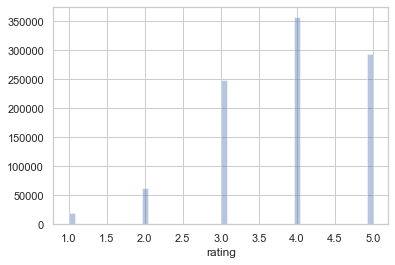

In [22]:

ax = sns.distplot(ratings.rating, kde=False)

## Number of ratings per user distribution

count    53424.000000
mean        18.376685
std         26.268690
min          2.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        200.000000
Name: rating, dtype: float64

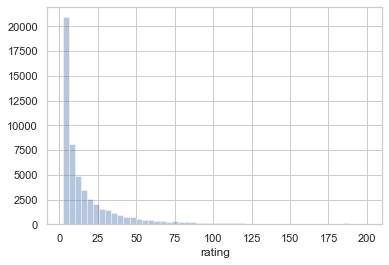

In [30]:
sns.set(style="whitegrid")
ax = sns.distplot(ratings.groupby('user_id')['rating'].count(), kde=False)
ratings.groupby('user_id')['rating'].count().describe()

## Number of ratings per book distribution


count    10000.000000
mean        98.175600
std          5.690167
min          8.000000
25%         99.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: rating, dtype: float64

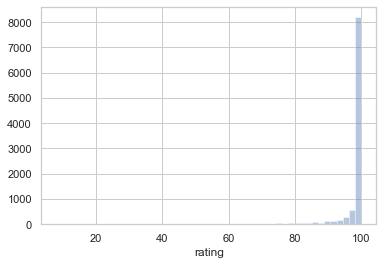

In [29]:
sns.set(style="whitegrid")
sns.distplot(ratings.groupby('book_id')['rating'].count(), kde=False)
ratings.groupby('book_id')['rating'].count().describe()

In [49]:
from goodreads10k.categories import get_categories
book_categories = get_categories()

## Book category distribution

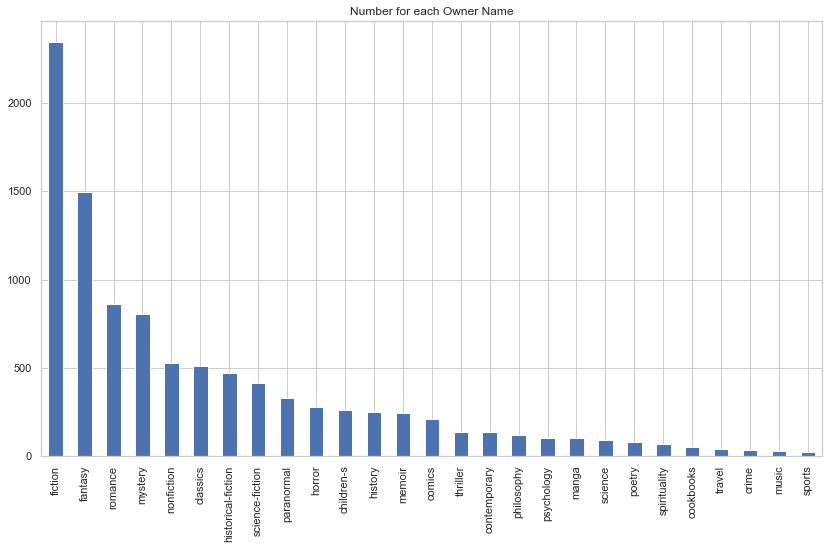

In [48]:
cats = pd.DataFrame([v for k, v in book_categories.items()], columns=['category'])
cats.category.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")

## Book categories excluding "Fiction" and "Non-fiction"

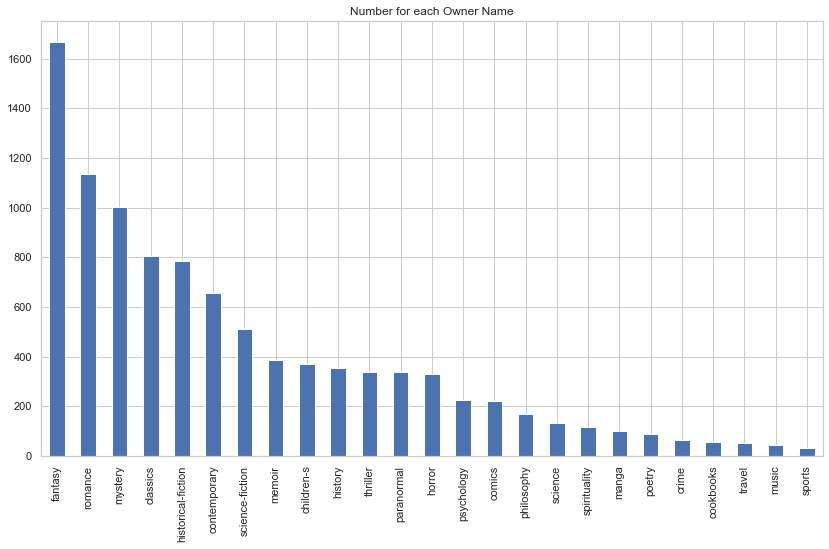

In [50]:
cats = pd.DataFrame([v for k, v in book_categories.items()], columns=['category'])
cats.category.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")